# Temperature Predicition Modeling Based on Air Quality in an Italian City

## Introduction

Air temperature is a fundamental aspect of the Earth's climate system and has profound effects on human life, ecosystems, and various industries. Monitoring air temperature is essential for understanding weather patterns, predicting climate change, and ensuring public safety. The need for accurate and continuous temperature monitoring has grown in importance due to the increasing threats posed by global warming, extreme weather events, and the impact of temperature fluctuations on agriculture, health, and energy consumption.

As a climate scientist studying the impact of gases on temperature, it is crucial to recognize the role of greenhouse gases in influencing air temperature. Carbon dioxide, methane, and other pollutants trap heat within the Earth's atmosphere, leading to rising global temperatures and climate instability. Monitoring air temperature provides critical data to assess the extent of these effects, enabling researchers to develop models that predict future trends and guide policy decisions. Understanding how different gases contribute to temperature changes allows scientists to advocate for effective emission reduction strategies and promote sustainability efforts.

## Objective

The objective of this project is to build a model that can correctly predict air temperature and identify which features has the most importance to the prediction.

## Data Description

The dataset used for this project contains the following features:

|Variable Name	|Role	|Type	|Description	|Units	|Missing Values|
|---------------|-------|-------|---------------|-------|--------------|
|Date	|Feature	|Date| | 			|no|
|Time	|Feature	|Categorical| |			|no|
|CO(GT)	|Feature	|Integer	|True hourly averaged concentration CO in mg/m^3 (reference analyzer)	|mg/m^3	|no|
|PT08.S1(CO)	|Feature	|Integer	|hourly averaged sensor response (nominally CO targeted)|		|no|
|NMHC(GT)	|Feature	|Integer	|True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)	|microg/m^3	|no|
|C6H6(GT)	|Feature	|Continuous	|True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)	|microg/m^3	|no|
|PT08.S2(NMHC)	|Feature	|Integer	|hourly averaged sensor response (nominally NMHC targeted)|		|no|
|NOx(GT)	|Feature	|Integer	|True hourly averaged NOx concentration in ppb (reference analyzer)|	ppb	|no|
|PT08.S3(NOx)	|Feature	|Integer	|hourly averaged sensor response (nominally NOx targeted)|		|no|
|NO2(GT)	|Feature	|Integer	|True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	|microg/m^3	|no|
|PT08.S4(NO2)	|Feature	|Integer	|hourly averaged sensor response (nominally NO2 targeted)|		|no|
|PT08.S5(O3)	|Feature	|Integer	|hourly averaged sensor response (nominally O3 targeted)|		|no|
|T	|Target	|Continuous	|Temperature	|°C	|no|
|RH	|Feature	|Continuous	|Relative Humidity	|%	|no|
|AH	|Feature	|Continuous	|Absolute Humidity|		|no|


## Exploratory Data Analysis

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
# View the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [4]:
# Convert the date and time columns to datetime format
df['datetime'] = df['Date'] + pd.to_timedelta(df['Time'].astype(str))
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [5]:
# Make datetime column the index
df = df.set_index('datetime')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [6]:
# Drop date and time column
df = df.drop(['Date', 'Time'], axis=1)
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2005-04-04 10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
2005-04-04 11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
2005-04-04 12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
2005-04-04 13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
2005-04-04 14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [7]:
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2005-04-04 10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
2005-04-04 11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
2005-04-04 12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
2005-04-04 13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
2005-04-04 14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


#### Plot the time series trend of the features and target

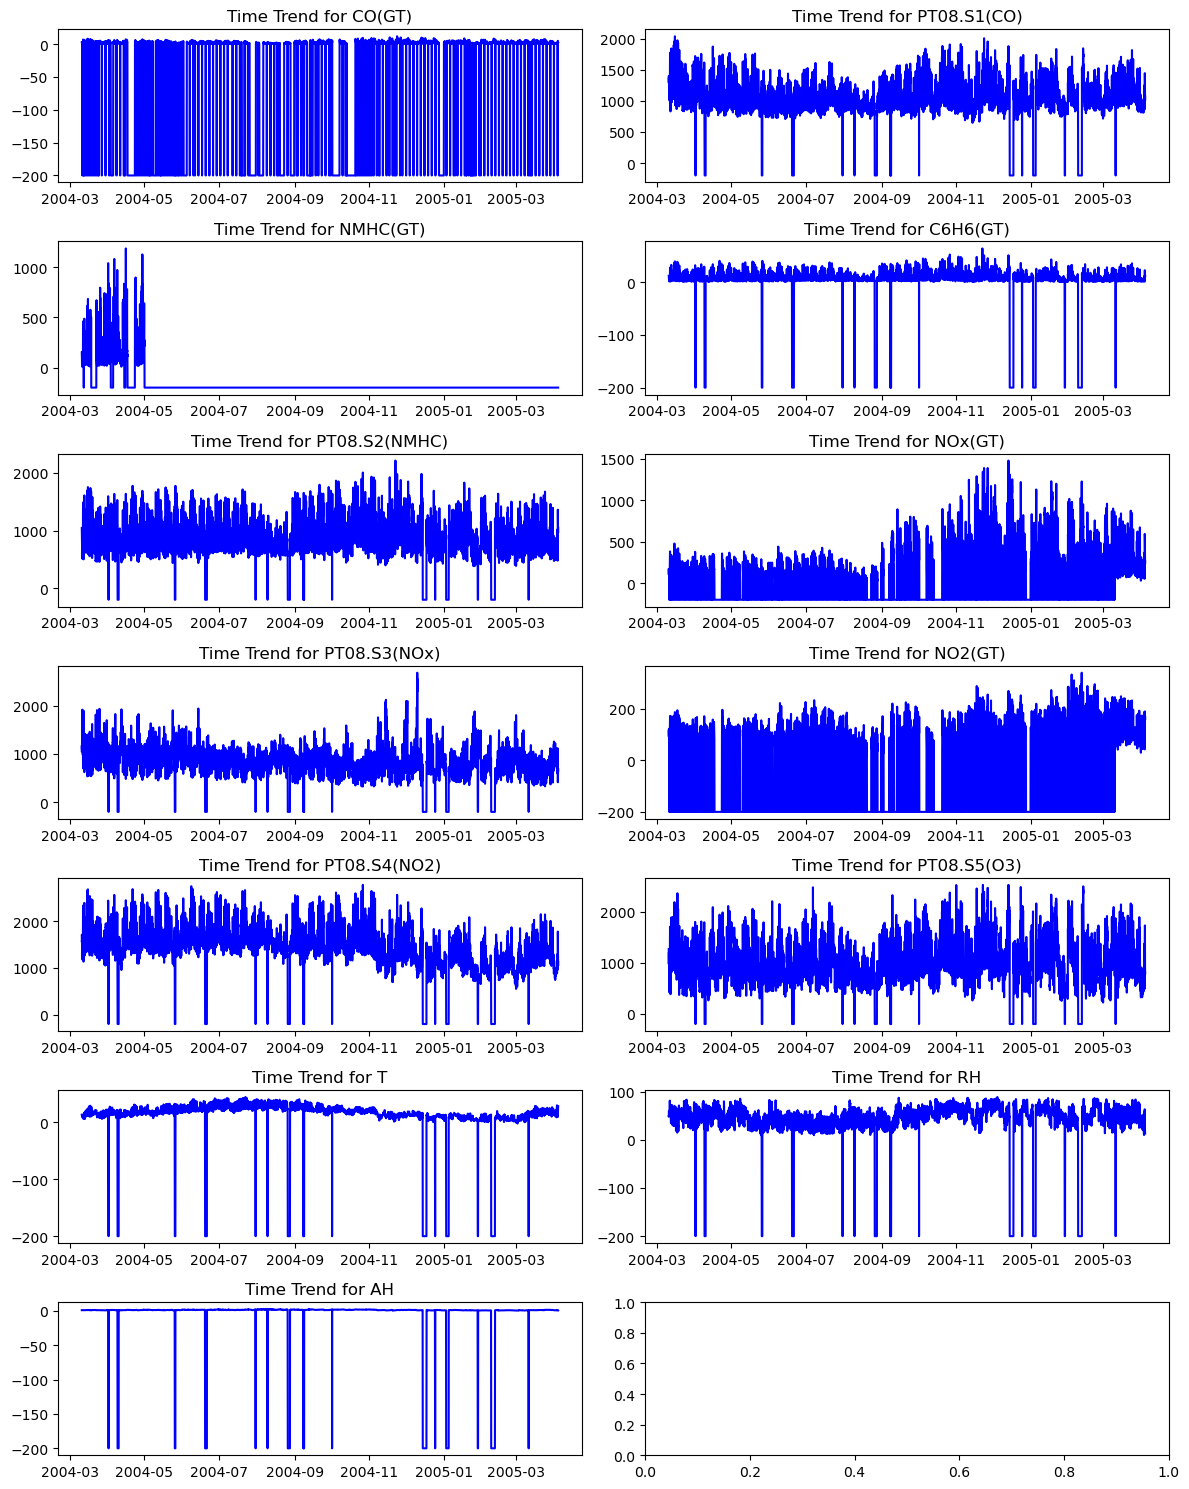

In [8]:
# Get the columns
columns = df.columns

#Plot the trends
fig, axes = plt.subplots(7, 2, figsize=(12, 15))
axes = axes.flatten()
for i, column in enumerate(columns):
    axes[i].plot(df.index, df[column], '-', color='blue')
    axes[i].set_title(f'Time Trend for {column}')
    
plt.tight_layout()
plt.show()

From the plot, there is a seasonal trend and correlation between temperature and most of the features. Further plot of correlation, will give an idea of the influence of the features on temperature.

#### Showing the correlation in the data

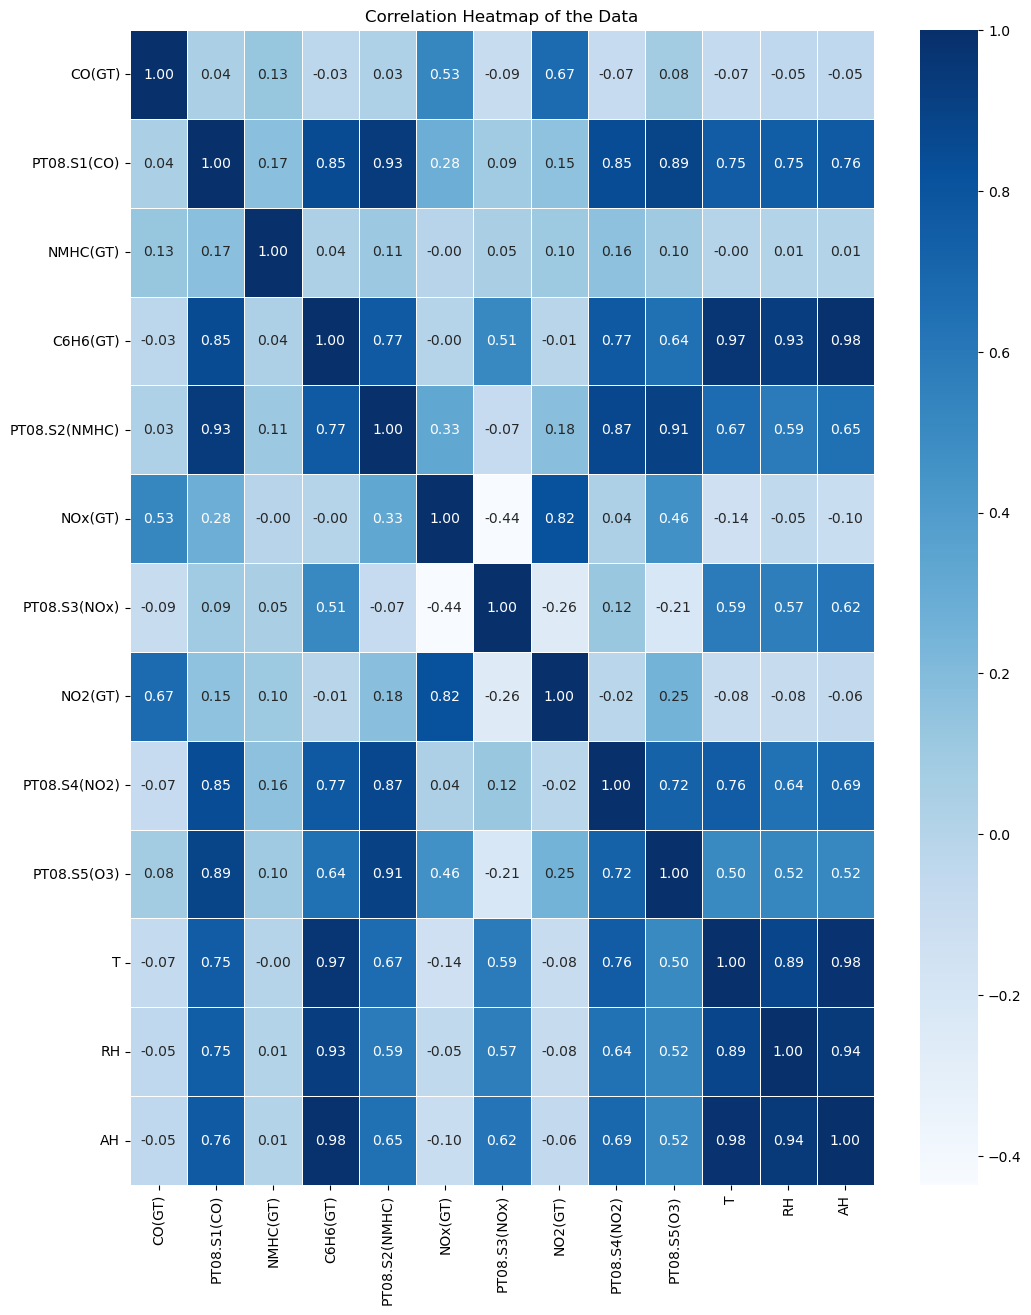

In [9]:
#Get the correlation
df_corr = df.corr()

# Plot the correlation
plt.figure(figsize= (12, 15))
sns.heatmap(df_corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of the Data')
plt.show()

The nominally targeted gases have a stronger correlation to temperature than the reference analyzer. The only exception is in Benzene (C6H6(GT)). This will influence the features that will be used in the development of the model.


## Feature Engineering


The properties of the date index will also be used as features in the model development. This is being done to observe if datetime also influences the temperature. Now I will create a function that will include the properties of datetime to the dataset.

In [10]:
# Create a function for the properties of datetime
def date_prop(y):
    """
    Create time series features based on the time series index
    """
    y = y.copy()
    y['year'] = y.index.year
    y['month'] = y.index.month
    y['quarter'] = y.index.quarter
    y['dayofweek'] = y.index.dayofweek
    y['hour'] = y.index.hour
    return y


Now, the data will be split into training and testing data. March 1st, 2005 will be the split point. Every data before this date will be used as the training data while, the data from the date to the most recent will be the test data.

In [11]:
# Split the data into train and test
train = df.loc[df.index < '2005-03-01']
test = df.loc[df.index >= '2005-03-01']

The next will be to include the necessary features and get the data ready for model development.

In [12]:
train.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [13]:
# Add the date features
train = date_prop(train)
test = date_prop(test)

# Create the features and target variables
feature = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
     'RH', 'AH', 'year', 'month', 'quarter', 'dayofweek', 'hour']
target = 'T'

X_train = train[feature]
y_train = train[target]
X_test = test[feature]
y_test = test[target]

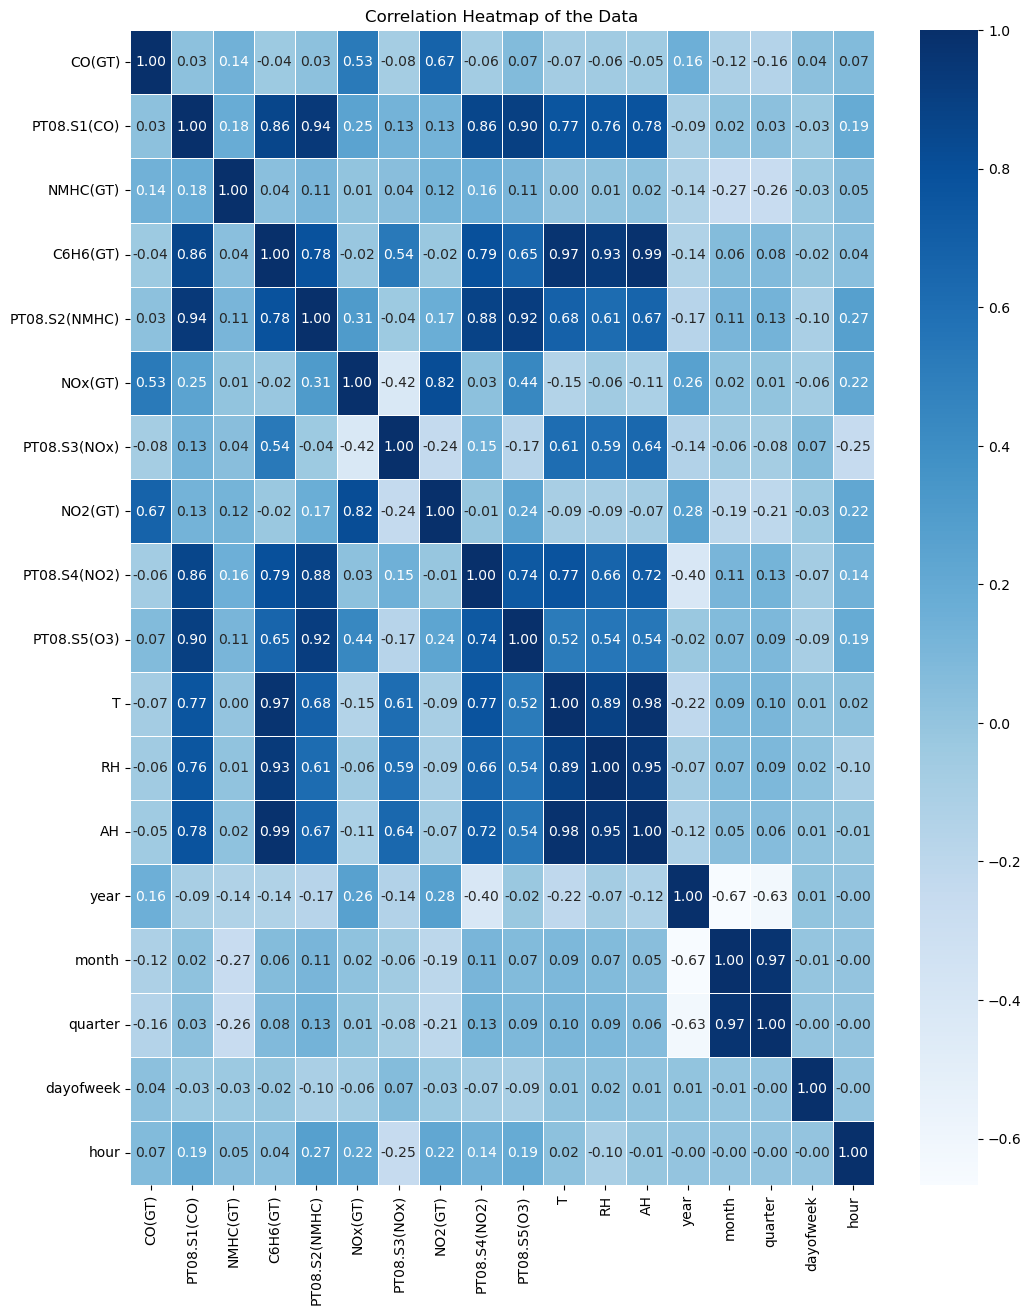

In [14]:
# Visualize the correlation between the features to the target
train_corr = train.corr()

plt.figure(figsize= (12, 15))
sns.heatmap(train_corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of the Data')
plt.show()

### Feature Selection

The first step will be to remove features with low variance. 

In [15]:
# Import the necessary libraries
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, SelectKBest

In [16]:
# Instantiate the class
ft_thres = VarianceThreshold(threshold=0) # Get features with a variance of zero
ft_thres.fit(X_train)
const_col = [column for column in X_train.columns
            if column not in X_train.columns[ft_thres.get_support()]]
# Print the features with variance of zero
print(const_col)

[]


We can observe that there is no feature with a variance of zero. The next step will be to identify the features that have a high correlation with each other and remove one of the pair. This is because features with high correlation with each other will perform like duplicate features in the model development.

In [17]:
# Build a function that identify high correlation between features
def correlation (data, threshold):
    """
    This takes in the datatset and correlation threshold.
    It returns the set of features that are greater than the
    correlation threshold.
    """
    col_cor = set()
    df_corr = data.corr()
    for i in range(len(df_corr.columns)):
        for j in range(i):
            if abs(df_corr.iloc[i, j]) > threshold:
                colname = df_corr.columns[i]
                col_cor.add(colname)
    return col_cor
    

In [18]:
# Print the features with high correlation
corr_features = correlation(X_train, 0.95)
print(corr_features)

{'AH', 'quarter'}


In [19]:
# Drop the features with high correlation with each other
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)

The next step will be to identify the features that have higher dependency based on the Information Gain (IG). This is done using Mutual Information (MI).

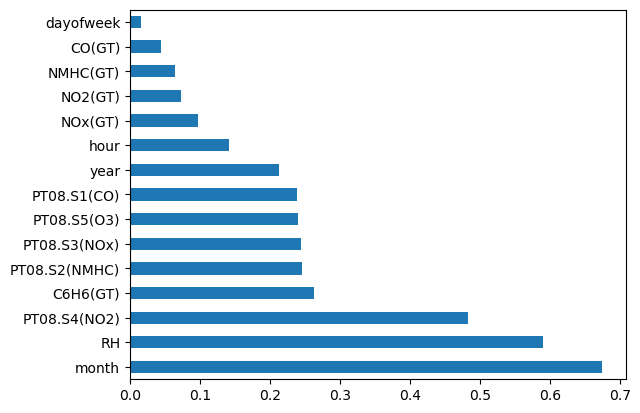

In [20]:
# Instantiate the class
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info, index= X_train.columns)
# Plot the output
mutual_info.sort_values(ascending= False).plot(kind= 'barh')
plt.show()

The next step will be to select the top 10 features based on the Mutual Information (MI). These are the features to be used for the model development.

In [21]:
# Instantiate the class
sel = SelectKBest(mutual_info_regression, k=9)
sel.fit(X_train, y_train)
# Transform the features
X_train_selected = sel.transform(X_train)
X_test_selected = sel.transform(X_test)
# Get selected feature names
selected_features = X_train.columns[sel.get_support()]
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_train

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,year,month
datetime,,,,,,,,,
2004-03-10 18:00:00,1360.00,11.881723,1045.50,1056.25,1692.00,1267.50,48.875001,2004,3
2004-03-10 19:00:00,1292.25,9.397165,954.75,1173.75,1558.75,972.25,47.700000,2004,3
2004-03-10 20:00:00,1402.00,8.997817,939.25,1140.00,1554.50,1074.00,53.975000,2004,3
2004-03-10 21:00:00,1375.50,9.228796,948.25,1092.00,1583.75,1203.25,60.000000,2004,3
2004-03-10 22:00:00,1272.25,6.518224,835.50,1205.00,1490.00,1110.00,59.575001,2004,3
...,...,...,...,...,...,...,...,...,...
2005-02-28 19:00:00,938.00,8.099001,903.25,790.00,884.50,798.00,37.900001,2005,2
2005-02-28 20:00:00,939.00,7.357560,872.25,813.50,870.25,792.75,38.000001,2005,2
2005-02-28 21:00:00,826.75,3.576895,686.75,1015.00,726.50,573.25,36.625000,2005,2


## Model Development 

The model will be developed using **xgboost**. 

In [22]:
# Import the necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [23]:
#Tune the hyperparameters of the model
model = xgb.XGBRegressor(random_state=123, objective= 'reg:squarederror')
xgb_pipe = Pipeline([('xgb_model', model)])
params = {
    'xgb_model__n_estimators': [100, 200, 300, 500, 1000],
    'xgb_model__learning_rate': np.arange(0.05, 1.05, 0.05),
    'xgb_model__subsample': np.arange(0.05, 1.05, 0.05),
    'xgb_model__alpha': np.arange(0, 1.1, 0.1),
    'xgb_model__max_depth': np.arange(3, 20, 1),
    'xgb_model__min_child_weight': np.arange(1, 20, 1),
    'xgb_model__gamma': np.arange(0, 1.1, 0.1)
}

xgb_cv = RandomizedSearchCV(estimator= xgb_pipe, param_distributions= params, 
                            n_iter=70, scoring= 'neg_mean_squared_error', cv= 5, verbose=1, random_state=123, n_jobs= -1)
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
{'xgb_model__subsample': 0.7500000000000001, 'xgb_model__n_estimators': 300, 'xgb_model__min_child_weight': 16, 'xgb_model__max_depth': 6, 'xgb_model__learning_rate': 0.25, 'xgb_model__gamma': 0.1, 'xgb_model__alpha': 0.1}


In [24]:
# Instantiate the model
xgb_model = xgb.XGBRegressor(random_state=123, objective= 'reg:squarederror', n_estimators = 300,
                            subsample= 0.75, max_depth= 6, min_child_weight = 16, learning_rate= 0.25, 
                            gamma= 0.1, alpha= 0.1)

# Create a pipeline to build the model
steps = [('xgb_model', xgb_model)]
xgb_pipe = Pipeline(steps)
xgb_pipe.fit(X_train, y_train)
y_train_pred = xgb_pipe.predict(X_train)
y_test_pred = xgb_pipe.predict(X_test)


# Model Evaluation

In [25]:
# Use the metrics to evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Number of observations
test_n = len(y_test)  
train_n = len(y_train)

# Number of predictors
test_p = X_test.shape[1] 
train_p = X_train.shape[1]

# Adjusted R2 score
adjusted_r2_test = 1 - ((1 - test_r2) * (test_n - 1) / (test_n - test_p - 1))
adjusted_r2_train = 1 - ((1 - train_r2) * (train_n - 1) / (train_n - train_p - 1))

#RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f'The training data adjusted R2 score is {adjusted_r2_train}')
print(f'The training data RMSE is {train_rmse}')
print(f'The testing data adjusted R2 score is {adjusted_r2_test}')
print(f'The testing data RMSE is {test_rmse}')

The training data adjusted R2 score is 0.9998593600800859
The training data RMSE is 0.5350367102162786
The testing data adjusted R2 score is 0.8736500063627151
The testing data RMSE is 3.454888864568705


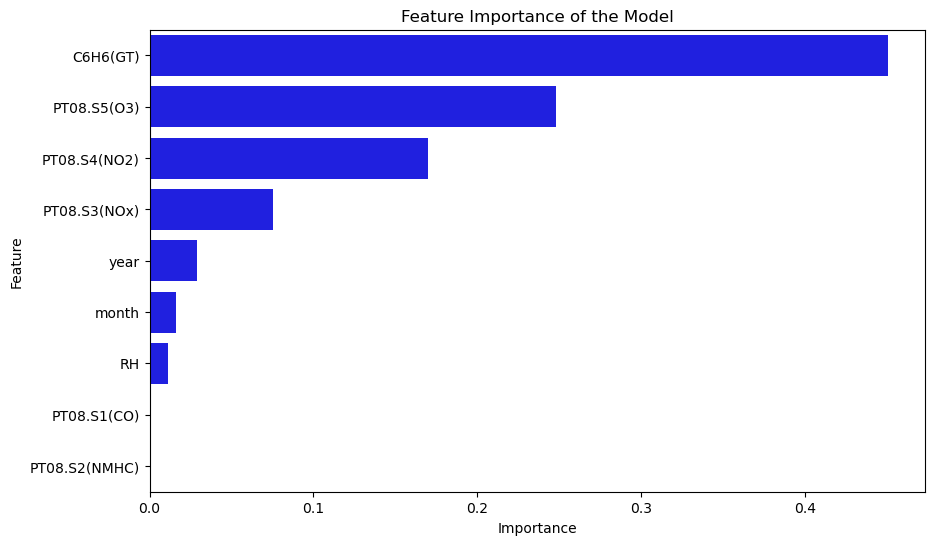

In [26]:
# Get feature importance

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, color='b')
plt.title("Feature Importance of the Model")
plt.show()

The model has a 87% general performance prediction with a Root mean squared error of 3.45. It can also be observed that the features which are important in predicting the temperture are: benzene, nominally targeted ozone, nominally targeted nitrogen oxides, nominally targeted nitrogen dioxide, relative humidity, year, and month.

In [27]:
import joblib

In [28]:
# Save the model
filepath = './temp_model.pkl'
joblib.dump(xgb_pipe, filepath)

['./temp_model.pkl']

## Conclusion



In conclusion, monitoring air temperature is vital for predicting weather conditions, addressing climate change, supporting agriculture, safeguarding public health, and optimizing energy consumption. As technology advances, the integration of satellite data, remote sensors, and artificial intelligence in temperature monitoring will enhance our ability to respond effectively to environmental challenges. The need for accurate temperature monitoring will continue to grow, making it an indispensable tool in managing the world’s climate and resources effectively.


Benzene (C6H6) has a high correlation with temperature (0.97) and it is also the feature with the highest importance to the model development. To mitigate the concentration of benzene will likewise, have the same effect to temperature. Benzene is both a synthetically made and naturally occurring chemical from processes that include: volcanic eruptions, wild fires, synthesis of chemicals such as phenol, production of synthetic fibers, and fabrication of rubbers, lubricants, pesticides, medications, and dyes. The major sources of benzene exposure are tobacco smoke, automobile service stations, exhaust from motor vehicles, incomplete combustion of Polyaromatic hydrocarbons (PAHs) and industrial emissions. The recommended air standard for benzene is 975 - 9750 mg/m3. Hydroxyl radicals in the atmosphere are the most important means of degradation of benzene while oxidants (like ozone and nitrate radicals) lessens the extent of degradation of benzene.